# Support Vector Machines From Scratch

## 间隔最大化可视化

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from numpy import *
from scipy import stats
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


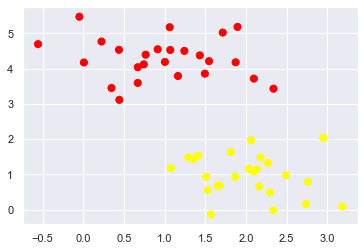

In [2]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

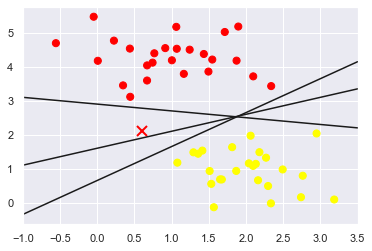

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

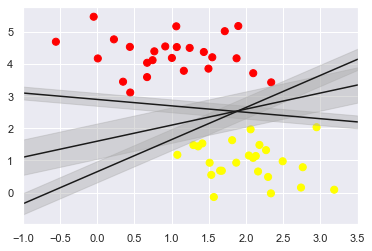

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

## 硬间隔支持向量机

SVM的任务就是寻找这样一个超平面把样本无误地分割成两部分，并使得超平面离最近的样本点间隔尽可能的大，可以构造得到如下的条件极值问题：
$$
\begin{align}
\min_{w,b}\quad &\frac{1}{2} \parallel w \parallel^2\\
s.t.\quad &y_i(w \cdot x_i + b)-1 \geq 0,\quad i=1,2,\cdots,N
\end{align}
$$
(如果公式显示不正常，安装VSCode插件Markdown All in One)

对于不等式约束的条件极值问题，可以用拉格朗日方法求解。而拉格朗日方程的构造规则是：用约束方程乘以非负的拉格朗日系数，然后再从目标函数中减去。于是得到拉格朗日方程如下：
$$
\begin{align}
&L(w,b,\alpha_i) = \frac{1}{2} \parallel w \parallel^2 - \sum_{i=1}^N \alpha_i(y_i(w \cdot x_i + b)-1),\\
&where\quad \alpha_i \geq 0 \tag{1}
\end{align}
$$

那么我们要处理的规划问题就变为：
$$ \min_{w,b}\; \max_{\alpha_i \geq 0}\; L(w,b,\alpha_i)$$

上式是一个凸规划问题，其意义是先对$\alpha$求偏导，令其等于$0$消掉$\alpha$，然后再对$w$和$b$求$L$的最小值。要直接求解上式是有难度的，这个问题可以通过拉格朗日对偶问题来解决，为此我们把上式做一个等价变换，即对偶变换：
$$ \min_{w,b}\; \max_{\alpha_i \geq 0}\; L(w,b,\alpha_i) = \max_{\alpha_i \geq 0}\; \min_{w,b}\; L(w,b,\alpha_i)$$

然后原凸规划问题可以转化为先对$w$和$b$求偏导，令其等于$0$消掉$w$和$b$，然后再对$\alpha$求$L$的最大值。下面我们就来求解上式，为此我们先计算$w$和$b$的偏导数。为了让$L$在$w$和$b$上取到最小值，令上式的两个偏导数分别为0，于是得到：
$$
\begin{align}
\frac{\partial L(w,b,\alpha_i)}{\partial w} &= w - \sum_{i=1}^N \alpha_i y_i x_i = 0\\
\frac{\partial L(w,b,\alpha_i)}{\partial b} &= - \sum_{i=1}^N \alpha_i y_i = 0 \tag{2}
\end{align}
$$

将式(2)代回式(1)，可得：
$$
\max_{\alpha_i \geq 0}\; \min_{w,b}\; L(w,b,\alpha_i) = \max_{\alpha_i \geq 0}\{\sum_{i=1}^N \alpha_i - \frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j (x_i \cdot x_j)\}
$$

我们的对偶问题就变为：
$$
\left\{
\begin{align}
\max_{\alpha_i \geq 0}\{\sum_{i=1}^N \alpha_i - &\frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j (x_i \cdot x_j)\}\\
s.t.\quad &\sum_{i=1}^N \alpha_i y_i = 0\\
          &\alpha_i \geq 0
\end{align}
\right.
$$

KKT条件
对于一般的任意问题而言，KKT条件是使一组解成为最优解的必要条件，当原问题是凸问题的时候，KKT条件也是充分条件。
$$
\begin{align}
& \nabla_w L(w^*,b^*,\alpha^*)=w^*-\sum_{i=1}^N \alpha_i^* y_i x_i = 0\\
& \nabla_b L(w^*,b^*,\alpha^*)=-\sum_{i=1}^N \alpha_i^* y_i = 0\\
& \alpha_i^* (y_i (w^* \cdot x_i + b^*) - 1) = 0,\quad i=1,2,\cdots,N\\
& y_i(w^* \cdot x_i + b^*) - 1 \geq 0, i=1,2,\cdots, N\\
& \alpha_i^* \geq 0,\quad i=1,2,\cdots,N
\end{align}
$$

支持向量的含义。
其中一个约束条件为：
$$ \alpha_i^* (y_i (w^* \cdot x_i + b^*) - 1) = 0,\quad i=1,2,\cdots,N $$
该约束的意义是：如果一个样本是支持向量，则其对应的拉格朗日系数非零；如果一个样本不是支持向量，则其对应的拉格朗日系数一定为0。由此可知大多数拉格朗日系数都是0。

决策分类
此时我们的决策函数表达式如下：
$$
\begin{align}
f(x) &= sign(w \cdot x + b)\\
&= sign((\sum_{i=1}^N \alpha_i y_i x_i) \cdot x + b) \\
&= sign(\sum_{i=1}^N \alpha_i y_i (x_i \cdot x) + b)
\end{align}
$$
原问题对于新来的要分类的样本首先根据$w$和$b$做一次线性运算，然后看求的结果是大于0还是小于0来判断正例还是负例。现在有了$\alpha_i$，我们不需要求出$w$，只需将新来的样本和训练数据中的所有样本做内积和即可。由于很多的$\alpha_i$都是0，所以运算量是很小的，这一过程可以看成数据压缩版本的KNN，同时内积运算也为核方法的使用做好了铺垫。

## 软间隔支持向量机

现实中训练数据是线性可分的情形较少，训练数据往往是近似线性可分的，这时使用线性支持向量机，或软间隔支持向量机。这时对每个样本点$(x_i,y_i)$引进一个松弛变量$\xi_i \geq 0$，使函数间隔加上松弛变量大于等于1，约束条件变为：
$$ y_i(w \cdot x_i + b) \geq 1 - \xi_i $$
目标函数则变为：
$$ \frac{1}{2} \parallel w \parallel^2 + C \sum_{i=1}^N \xi_i $$
对偶问题变为：
$$
\left\{
\begin{align}
\max_{\alpha_i \geq 0}\{\sum_{i=1}^N \alpha_i - &\frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j (x_i \cdot x_j)\}\\
s.t.\quad &\sum_{i=1}^N \alpha_i y_i = 0\\
          & 0 \leq \alpha_i \leq C,\quad i=1,2,\cdots,N
\end{align}
\right.
$$其中，$C$称为惩罚参数，它的值越大对误分类的惩罚增大，越小对误分类的惩罚减小。
同时，根据其KKT条件我们可得：
$$
\begin{align}
\alpha_i &= 0 &\Rightarrow y_i(w \cdot x_i + b) \geq 1 \\
\alpha_i &= C &\Rightarrow y_i(w \cdot x_i + b) \leq 1 \\
0 < \alpha_i &< C &\Rightarrow y_i(w \cdot x_i + b) = 1
\end{align}
$$
第一个式子表明如果$\alpha_i=0$，那么该样本落在两条间隔线外。第二个式子表明如果$\alpha_i=C$，那么该样本有可能落在两条间隔线内部，也有可能落在两条间隔线上面，主要看对应的松弛变量的取值是等于$0$还是大于$0$，第三个式子表明如果$0<\alpha_i<C$，那么该样本一定落在分隔线上。

## 非线性支持向量机

对于输入空间中的非线性分类问题，可以通过非线性变换将它转化为某个高维特征空间中的线性分类问题，在高维特征空间中学习线性支持向量机。由于在线性支持向量机学习的对偶问题里，目标函数和分类决策函数都只涉及实例与实例之间的内积，所以不需要显式地指定非线性变换，而是用核函数来替换当中的内积。核函数表示，通过一个非线性转换后的两个实例间的内积。具体地，$K(x,z)$是一个核函数，或正定核，意味着存在一个从输入空间x到特征空间的映射$\mathcal{X} \rightarrow \mathcal{H}$，对任意$\mathcal{X}$，有

$$K(x, z)=\phi(x) \cdot \phi(z)$$
所以，在线性支持向量机学习的对偶问题中，用核函数$K(x,z)$替代内积，求解得到的就是非线性支持向量机

$$f(x)=\operatorname{sign}\left(\sum_{i=1}^{N} \alpha_{i}^{*} y_{i} K\left(x, x_{i}\right)+b^{*}\right)$$

**核函数：解决低维空间线性分类器无法使用的问题，内积只涉及样本间的操作**

## SMO算法

SMO算法的思想很简单，它将大优化的问题分解成多个小优化的问题。这些小问题往往比较容易求解，并且对他们进行顺序求解的结果与将他们作为整体来求解的结果完全一致。在结果完全一致的同时，SMO的求解时间短很多。
算法的过程就是迭代执行下列步骤直到收敛
1. 选择两个拉格朗日乘子$\alpha_i$和$\alpha_j$；
2. 固定其他拉格朗日乘子，只对$\alpha_i$和$\alpha_j$优化$w(\alpha)$;
3. 根据优化后的$\alpha_i$和$\alpha_j$，更新截距$b$的值。

In [5]:
# 定义类，方便存储数据
class optStruct:
    def __init__(self,dataMatIn, classLabels, C, toler, kTup):  # 存储各类参数
        self.X = dataMatIn  # 数据特征
        self.labelMat = classLabels # 数据类别
        self.C = C # 软间隔参数C，参数越大，非线性拟合能力越强
        self.tol = toler # 停止阀值
        self.m = shape(dataMatIn)[0] # 数据行数
        self.alphas = mat(zeros((self.m, 1)))
        self.b = 0 # 初始设为0
        self.eCache = mat(zeros((self.m,2))) # 缓存
        self.K = mat(zeros((self.m, self.m))) # 核函数的计算结果
        for i in range(self.m):
            self.K[:,i] = kernelTrans(self.X, self.X[i,:], kTup)

In [6]:
def loadDataSet(filename): #读取数据
    dataMat = []
    labelMat = []
    fr = open(filename)
    for line in fr.readlines():
        lineArr = line.split()
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat, labelMat # 返回数据特征和数据类别

In [7]:
def selectJrand(i, m): # 在0-m中随机选择一个不是i的整数
    j = i
    while (j == i):
        j = int(random.uniform(0, m))
    return j

In [8]:
def clipAlpha(aj, H, L):  # 保证a在L和H范围内（L <= a <= H）
    if aj > H:
        aj = H
    if L > aj:
        aj = L
    return aj

In [9]:
def kernelTrans(X, A, kTup): # 核函数, 输入参数, X:支持向量的特征树；A：某一行特征数据；kTup：('lin',k1)核函数的类型和参数
    m, n = shape(X)
    K = mat(zeros((m, 1)))
    if kTup[0] == 'lin': #线性函数
        K = X * A.T
    elif kTup[0] == 'rbf': # 径向基函数(radial bais function)
        for j in range(m):
            deltaRow = X[j,:] - A
            K[j] = deltaRow * deltaRow.T
        K = exp(K / (-1 * kTup[1]**2)) #返回生成的结果
    else:
        raise NameError('That Kernel is not recognized')
    return K

In [10]:
#定义类，方便存储数据
class optStruct:
    def __init__(self,dataMatIn, classLabels, C, toler, kTup):  # 存储各类参数
        self.X = dataMatIn  #数据特征
        self.labelMat = classLabels #数据类别
        self.C = C #软间隔参数C，参数越大，非线性拟合能力越强
        self.tol = toler #停止阀值
        self.m = shape(dataMatIn)[0] #数据行数
        self.alphas = mat(zeros((self.m, 1)))
        self.b = 0 #初始设为0
        self.eCache = mat(zeros((self.m, 2))) #缓存
        self.K = mat(zeros((self.m, self.m))) #核函数的计算结果
        for i in range(self.m):
            self.K[:,i] = kernelTrans(self.X, self.X[i,:], kTup)

$$ f(x) = \sum_{i=1}^N \alpha_i y_i K(x_i,x) + b $$
$$ E_k = g(x_k) - y_k = (\sum_{j=1}^N \alpha_j y_j K(x_j,x_j) + b) - y_k,\quad k=1,2 $$
$E_k$为函数$f(x)$对输入$x_k$的预测值与真实输出$y_k$之差

In [11]:
def calcEk(oS, k):
    fXk = float(multiply(oS.alphas, oS.labelMat).T * oS.K[:,k] + oS.b)
    Ek = fXk - float(oS.labelMat[k])
    return Ek

第一个变量$\alpha_1$已定之后，$E_1$也确定了。根据后面的式(6)，可以知道$\alpha_2^{new}$是依赖于$|E_1 - E_2|$的，我们选择第二个变量的标准是希望能使$\alpha_2$有足够大的变化，所以一个简单的做法就是选择$\alpha_2$，使其对应的$|E_1 - E_2|$最大。为了节省计算时间，将所有$E_i$值保存在一个列表中，即eCache。

In [12]:
# 选取第二个变量aj，并返回其E值
def selectJ(i, oS, Ei):
    maxK = -1
    maxDeltaE = 0
    Ej = 0
    oS.eCache[i] = [1, Ei]
    validEcacheList = nonzero(oS.eCache[:,0].A)[0]  # 返回矩阵中的非零位置的行数
    if (len(validEcacheList)) > 1:
        for k in validEcacheList:
            if k == i:
                continue
            Ek = calcEk(oS, k)
            deltaE = abs(Ei - Ek)
            if (deltaE > maxDeltaE): # 返回步长最大的aj
                maxK = k
                maxDeltaE = deltaE
                Ej = Ek
        return maxK, Ej
    else:
        j = selectJrand(i, oS.m)
        Ej = calcEk(oS, j)
    return j, Ej

在每次完成两个变量的优化之后，还必须更新对应的$E_k$值。

In [13]:
def updateEk(oS, k): # 更新os数据
    Ek = calcEk(oS, k)
    oS.eCache[k] = [1, Ek]

- 第1个变量的选择
检验训练样本点$(x_i, y_i)$是否满足KKT条件，即
$$
\begin{align}
\alpha_i = 0 &\Leftrightarrow y_i g(x_i) \geq 1\\
0 < \alpha_i < C &\Leftrightarrow y_i g(x_i) = 1\\
\alpha = C &\Leftrightarrow g(x_i) \leq 1 \tag{3}
\end{align}
$$
其中，$g(x_i) = \sum_{j=1}^N \alpha_j y_j K(x_i, x_j) + b$. 该检验是在$\epsilon$范围内进行的，在检验过程中，外层循环首先遍历所有满足$0<\alpha_i<C$的样本点，即在间隔边界上的支持向量点，检验它们是否满足KKT条件。如果这些样本点都满足KKT条件，那么遍历整个训练集，检验它们是否满足KKT条件。

确定第二个变量的取值空间，$\alpha_1$和$\alpha_2$的约束条件如下：
$$ 0 \leq \alpha_{i=1,2} \leq C $$
$$ \alpha_1 y_1 + \alpha_2 y_2 = \zeta = -\sum_{i=3}^N \alpha_i y_i = constant $$
<center>
<img src="./smo_select_i_j.png">
</center>
最优解必须要在方框内且在直线上取得，因此

$$L \leq \alpha_2^{new} \leq H$$

$$ if\quad y_1 \neq y_2,\quad L = \max(0, \alpha_2^{old} - \alpha_1^{old}),\quad H = \min(C, C+\alpha_2^{old} - \alpha_1^{old})$$
$$ if\quad y_1 = y_2,\quad L= \max(0, \alpha_1^{old} + \alpha_2^{old} - C),\quad H = \min(C, \alpha_2^{old} + \alpha_1^{old}) $$

$\alpha_2$沿着约束方向未经剪辑时的解：
$$ \alpha_2^{new,unc} = \alpha_2^{old} + \frac{y_2(E_1 - E_2)}{\eta} \tag{4} $$
其中，
$$ \eta = K_{11} + K_{22} - 2K_{12} = \parallel \Phi(x_1) - \Phi(x_2) \parallel^2 \tag{5} $$
这里$\Phi(x)$是输入空间到特征空间的映射。
由$\alpha_2^{new}$求得$\alpha_1^{new}$是
$$ \alpha_1^{new} = \alpha_1^{old} + y_1 y_2 (\alpha_2^{old} - \alpha_2^{new}) \tag{6} $$

计算阈值$b$和差值$E_i$
在每次完成两个变量的优化后，都要重新计算阈值b。当$0<\alpha_1^{new}<C$时，由KKT条件可知：
$$ \sum_{i=1}^N \alpha_i y_i K_{i1} + b = y_1 $$
于是
$$ b_1^{new} = y_1 - \sum_{i=3}^N \alpha_i y_i K_{i1} - \alpha_1^{new} y_1 K_{11} - \alpha_2^{new} y_2 K_{21} \tag{7} $$
由$E_1$的定义式有
$$ E_1 = \sum_{i=3}^N \alpha_i y_i K_{i1} + \alpha_1^{old} y_1 K_{11} + \alpha_2^{old} y_2 K_{21} + b^{old} - y_1 $$
式(7)的前两项可写成：
$$ y_1 - \sum_{i=3}^N \alpha_i y_i K_{i1} = -E_1 + \alpha_1^{old} y_1 K_{11} + \alpha_2^{old} y_2 K_{21} + b^{old}  $$
代入式(7)，可得
$$ b_1^{new} = -E_1 - y_1 K_{11} (\alpha_1^{new} - \alpha_1^{old}) - y_2 K_{21} (\alpha_2^{new} - \alpha_2^{old}) + b^{old} \tag{8} $$
同样，如果$0<\alpha_2^{new}<C$，那么
$$ b_2^{new} = -E_2 - y_1 K_{12} (\alpha_1^{new} - \alpha_1^{old}) - y_2 K_{22} (\alpha_2^{new} - \alpha_2^{old}) + b^{old} \tag{9} $$

In [14]:
# 首先检验ai是否满足KKT条件，如果不满足，随机选择aj进行优化，更新ai,aj,b值
def innerL(i, oS): # 输入参数i和所有参数数据
    Ei = calcEk(oS, i) #计算E值
    if ((oS.labelMat[i]*Ei < -oS.tol) and (oS.alphas[i] < oS.C)) or ((oS.labelMat[i]*Ei > oS.tol) and (oS.alphas[i] > 0)): #检验这行数据是否符合KKT条件 参考公式(3)
        j, Ej = selectJ(i, oS, Ei) # 随机选取aj，并返回其E值
        alphaIold = oS.alphas[i].copy()
        alphaJold = oS.alphas[j].copy()
        if (oS.labelMat[i] != oS.labelMat[j]): # 确定第二个变量的取值范围
            L = max(0, oS.alphas[j] - oS.alphas[i])
            H = min(oS.C, oS.C + oS.alphas[j] - oS.alphas[i])
        else:
            L = max(0, oS.alphas[j] + oS.alphas[i] - oS.C)
            H = min(oS.C, oS.alphas[j] + oS.alphas[i])
        if L==H:
            return 0
        eta = 2.0 * oS.K[i,j] - oS.K[i,i] - oS.K[j,j] # 参考公式(5)
        if eta >= 0:
            return 0
        oS.alphas[j] -= oS.labelMat[j]*(Ei - Ej)/eta # 参考公式(4)
        oS.alphas[j] = clipAlpha(oS.alphas[j], H, L) # 剪辑α2
        updateEk(oS, j) # 更新对应的E值
        if (abs(oS.alphas[j] - alphaJold) < oS.tol): # alpha变化大小阀值（自己设定）
            return 0
        oS.alphas[i] += oS.labelMat[j]  *oS.labelMat[i] * (alphaJold - oS.alphas[j])# 参考公式(6)
        updateEk(oS, i) # 更新对应的E值
        # 以下求解b的过程，参考公式(7)(8)(9)
        b1 = oS.b - Ei- oS.labelMat[i] * (oS.alphas[i]-alphaIold)*oS.K[i,i] - oS.labelMat[j] * (oS.alphas[j]-alphaJold) * oS.K[i,j]
        b2 = oS.b - Ej- oS.labelMat[i] * (oS.alphas[i]-alphaIold)*oS.K[i,j]- oS.labelMat[j] * (oS.alphas[j]-alphaJold) * oS.K[j,j]
        # 选择符合KKT条件的b，如果都符合则取b1和b2的中点
        if (0 < oS.alphas[i] < oS.C):
            oS.b = b1
        elif (0 < oS.alphas[j] < oS.C):
            oS.b = b2
        else:
            oS.b = (b1 + b2)/2.0
        return 1
    else:
        return 0

优先选择遍历非边界数据样本，因为非边界数据样本更有可能需要调整，边界数据样本常常不能得到进一步调整而留在边界上。由于大部分数据样本都很明显不可能是支持向量，因此对应的$\alpha$乘子一旦取得零值就无需再调整。遍历非边界数据样本并选出他们当中违反KKT 条件为止。当某一次遍历发现没有非边界数据样本得到调整时，遍历所有数据样本，以检验是否整个集合都满足KKT条件。如果整个集合的检验中又有数据样本被进一步进化，则有必要再遍历非边界数据样本。这样，不停地在遍历所有数据样本和遍历非边界数据样本之间切换，直到整个样本集合都满足KKT条件为止。以上用KKT条件对数据样本所做的检验都以达到一定精度ε就可以停止为条件。如果要求十分精确的输出算法，则往往不能很快收敛。

In [15]:
#SMO函数，用于快速求解出alpha
def smoP(dataMatIn, classLabels, C, toler, maxIter,kTup=('lin', 0)): # 输入参数：数据特征，数据类别，参数C，阀值toler，最大迭代次数，核函数（默认线性核）
    oS = optStruct(mat(dataMatIn), mat(classLabels).transpose(), C, toler, kTup)
    iter = 0
    entireSet = True
    alphaPairsChanged = 0
    while (iter < maxIter) and ((alphaPairsChanged > 0) or (entireSet)):
        alphaPairsChanged = 0
        if entireSet:
            for i in range(oS.m): # 遍历所有数据
                alphaPairsChanged += innerL(i,oS)
            iter += 1
        else:
            nonBoundIs = nonzero((oS.alphas.A > 0) * (oS.alphas.A < C))[0]
            for i in nonBoundIs: # 遍历非边界的数据
                alphaPairsChanged += innerL(i,oS)
            iter += 1
        if entireSet:
            entireSet = False
        elif (alphaPairsChanged == 0):
            entireSet = True
        print("iteration number: %d" % iter)
    return oS.b, oS.alphas

In [16]:
def SVM(data_train, data_test):
    dataArr,labelArr = loadDataSet(data_train) # 读取训练数据
    b, alphas = smoP(dataArr, labelArr, 200, 0.0001, 10000, ('rbf', 1.3)) # 通过SMO算法得到b和alpha
    datMat = mat(dataArr)
    labelMat = mat(labelArr).transpose()
    svInd = nonzero(alphas)[0]  # 选取不为0数据的行数（也就是支持向量）
    sVs = datMat[svInd] # 支持向量的特征数据
    labelSV = labelMat[svInd] # 支持向量的类别（1或-1）
    print("There are %d Support Vectors" % shape(sVs)[0]) # 打印出共有多少的支持向量
    m,n = shape(datMat) # 训练数据的行列数
    errorCount = 0
    for i in range(m):
        kernelEval = kernelTrans(sVs, datMat[i,:], ('rbf', 1.3)) # 将支持向量转化为核函数
        predict = kernelEval.T * multiply(labelSV, alphas[svInd]) + b  # 最后确定的分离平面只有那些支持向量决定。
        if sign(predict) != sign(labelArr[i]): # sign函数 -1 if x < 0, 0 if x==0, 1 if x > 0
            errorCount += 1
    print("The training error rate is: %f" % (float(errorCount) / m)) # 打印出错误率
    dataArr_test, labelArr_test = loadDataSet(data_test) # 读取测试数据
    errorCount_test = 0
    datMat_test = mat(dataArr_test)
    labelMat = mat(labelArr_test).transpose()
    m, n = shape(datMat_test)
    for i in range(m): # 在测试数据上检验错误率
        kernelEval = kernelTrans(sVs, datMat_test[i,:], ('rbf', 1.3))
        predict = kernelEval.T * multiply(labelSV, alphas[svInd]) + b
        if sign(predict) != sign(labelArr_test[i]):
            errorCount_test += 1
    print("The test error rate is: %f" % (float(errorCount_test) / m))

In [17]:
def main():
    filename_traindata = "traindata.csv"
    filename_testdata = "testdata.csv"
    SVM(filename_traindata, filename_testdata)

In [18]:
if __name__=='__main__':
    main()

iteration number: 1
iteration number: 2
iteration number: 3
iteration number: 4
iteration number: 5
There are 31 Support Vectors
The training error rate is: 0.130000
The test error rate is: 0.150000


In [19]:
train_data, train_label = loadDataSet("traindata.csv")
test_data, test_label = loadDataSet("testdata.csv")

In [20]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(train_data, train_label)

SVC()

In [21]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(test_data)
accuracy_score(test_label, y_pred)

0.93